C:\Users\panda\AppData\Local\Temp\ipykernel_25692\3408239424.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][0] += -alpha * dJdW1_11
C:\Users\panda\AppData\Local\Temp\ipykernel_25692\3408239424.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[0][1] += -alpha * dJdW1_12
C:\Users\panda\AppData\Local\Temp\ipykernel_25692\3408239424.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W1[1][0] += -alpha * dJdW1_21
C:\Users\panda\AppData\Local\Temp\ipy

MSE and MAPE at epoch  0  : 0.510389681065705  , 1.0
MSE and MAPE at epoch  5  : 0.009827538921586748  , 1.0
MSE and MAPE at epoch  10  : 0.0035413931048231  , 1.0
MSE and MAPE at epoch  15  : 0.0030434839817226793  , 1.0
MSE and MAPE at epoch  20  : 0.002804825345077574  , 1.0
MSE and MAPE at epoch  25  : 0.002610584565030991  , 1.0
MSE and MAPE at epoch  30  : 0.0024384434982557103  , 1.0
MSE and MAPE at epoch  35  : 0.0022839501838814876  , 1.0
MSE and MAPE at epoch  40  : 0.0021448195013320476  , 1.0
MSE and MAPE at epoch  45  : 0.002019236895688779  , 1.0
MSE and MAPE at epoch  49  : 0.0019274657817192392  , 1.0


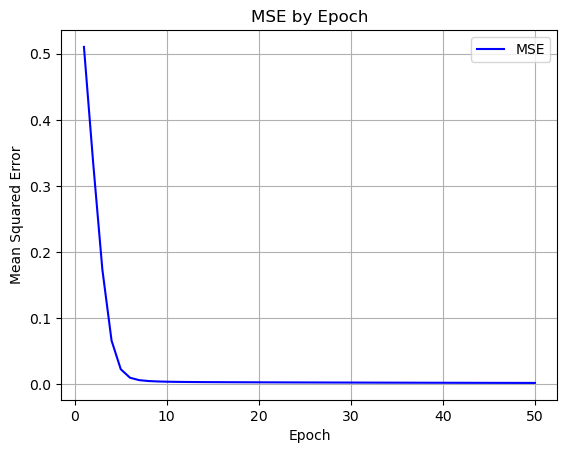

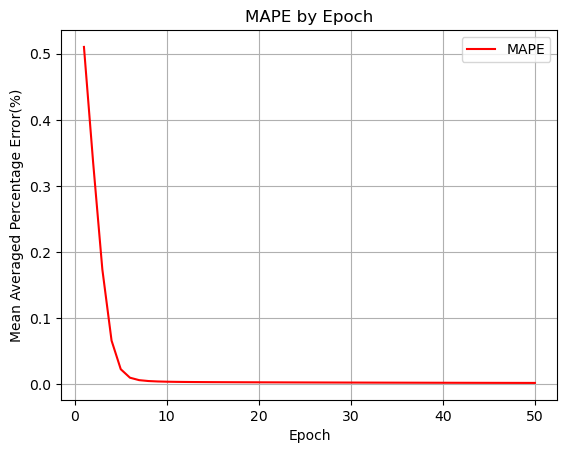

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
samples = 1000

x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

Input = np.column_stack((x1, x2))

y = 2 * x1 + 3 * x2 - 1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

Input_layer_size = 2
hidden_layer_size = 3
output_layer_size = 1

W1 = np.random.randn(hidden_layer_size, Input_layer_size)
b1 = np.random.randn(hidden_layer_size)
W2 = np.random.randn(output_layer_size, hidden_layer_size)
b2 = np.random.randn(output_layer_size)

alpha = 1e-2
epochs = 50
MSE_list, MAPE_list = [], []

for epoch in range(epochs):
    MSE,MAPE = 0,0
    for iter in range(samples):
        X = Input[iter]
        Z_tilde = W1@X.reshape(-1,1) + b1.reshape(-1,1)
        Z = sigmoid(Z_tilde)
        y_pred = W2@Z.reshape(-1,1) + b2.reshape(-1,1)
        J = 1/2*(y_pred - y[iter])**2
        MSE += J
        MAPE += np.abs((y_pred - y[iter])/y[iter]) * 100

        dJdY = y_pred - y[iter]
        dJdW2_11, dJdW2_12, dJdW2_13 = dJdY* Z[0] , dJdY * Z[1], dJdY * Z[2]
        dJdb2 = dJdY
        dJdZ1, dJdZ2, dJdZ3 = dJdY * W2[0,0], dJdY * W2[0,1], dJdY * W2[0,2]

        dJdW1_11 = dJdZ1 * X[0] * sigmoid_derivative(Z_tilde[0])
        dJdW1_12 = dJdZ1 * X[0] * sigmoid_derivative(Z_tilde[0]) 
        dJdW1_21 = dJdZ2 * X[0] * sigmoid_derivative(Z_tilde[1])
        dJdW1_22 = dJdZ2 * X[1] * sigmoid_derivative(Z_tilde[1])
        dJdW1_31 = dJdZ3 * X[1] * sigmoid_derivative(Z_tilde[2])
        dJdW1_32 = dJdZ3 * X[1] * sigmoid_derivative(Z_tilde[2])
        dJdb1_1 = dJdZ1 * sigmoid_derivative(Z_tilde[0])
        dJdb1_2 = dJdZ2 * sigmoid_derivative(Z_tilde[1])
        dJdb1_3 = dJdZ3 * sigmoid_derivative(Z_tilde[2])

        W1[0][0] += -alpha * dJdW1_11
        W1[0][1] += -alpha * dJdW1_12
        W1[1][0] += -alpha * dJdW1_21
        W1[1][1] += -alpha * dJdW1_22
        W1[2][0] += -alpha * dJdW1_31
        W1[2][1] += -alpha * dJdW1_32
        b1[0] += -alpha * dJdb1_1
        b1[1] += -alpha * dJdb1_2
        b1[2] += -alpha * dJdb1_3
        W2[0][0] += -alpha * dJdW2_11
        W2[0][1] += -alpha * dJdW2_12
        W2[0][2] += -alpha * dJdW2_13
        b2[0] += -alpha * dJdb2
    MSE, MAPE = MSE / samples, MAPE / MAPE
    MSE_list.append(np.squeeze(MSE))
    MAPE_list.append(np.squeeze(MAPE))
    if epoch % 5 == 0 or epoch == epochs-1:
       print('MSE and MAPE at epoch ', epoch, ' :',
             np.squeeze(MSE), ' ,', np.squeeze(MAPE))

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MSE', linewidth=1.5, color='b')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE by Epoch')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(np.arange(1,epochs+1), MSE_list, label='MAPE', linewidth=1.5, color='r')
#plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Mean Averaged Percentage Error(%)')
plt.title('MAPE by Epoch')
plt.legend()
plt.grid(True)
plt.show()